In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Image Processing with Neural Network
## Lecture 04 - One Hidden Layer

- Moons Dataset
- Decision Boundary
- Loss curve
- Sigmoid, Tanh

<img src='../../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align = "left"/>

## Import Statements

In [5]:
###-----------------
### Import Libraries
###-----------------

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn                 import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## Setup Global Parameters

In [7]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0
EPOCHS = 20000  # number of epochs
ALPHA = 1 # learning rate
N_SAMPLES = 1000

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [8]:
def fn_plot_decision_boundary(predict, X, y):
    
    # initialize the figure
    fig, ax = plt.subplots(figsize = (8,5))
    
    # Small increment to create object function surface
    dm = 0.01
    
    # Range of X values (First feature)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    
    # Range of Y values (Second feature)
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Create a grid to evaluate the object function
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # flatten and stack
    # arrays will be stacked along their last axis after being upgraded to at least 2-D 
    # with 1’s post-pended to the shape (column vectors made out of 1-D arrays)
    XX = np.c_[xx.ravel(), yy.ravel()] 
    
    # list to collect predictions
    Z = predict(XX)
        
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k', cmap=plt.cm.bwr)
    ax.set_title('Decision Boundary')

    ax.set_xlabel('A')
    ax.set_ylabel('B')
    plt.show()

## Generate Data Set
<div style="font-family: Arial; font-size:1.2em">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [10]:
X, y = datasets.make_moons(n_samples=N_SAMPLES,
                           noise=NOISE, 
                           shuffle=True, 
                           random_state=RANDOM_STATE)
# X, y = datasets.make_circles(n_samples=N_SAMPLES,
#                            noise=NOISE, 
#                            shuffle=True, 
#                            random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.67874295,  0.73437593],
        [-0.61146339,  0.79127273],
        [ 1.99427795,  0.39317601],
        [-0.98953437,  0.14429736],
        [-0.99873189,  0.05034492]]),
 array([0, 0, 1, 0, 0], dtype=int64))

In [11]:
data_df = pd.DataFrame(X, columns=['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.678743,0.734376,0
1,-0.611463,0.791273,0
2,1.994278,0.393176,1
3,-0.989534,0.144297,0
4,-0.998732,0.050345,0


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [13]:
data_df.describe()

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.500000,0.250000,0.50000
std,0.867036,0.494036,0.50025
min,-1.000000,-0.499995,0.00000
25%,-0.000787,-0.204875,0.00000
50%,0.500000,0.250000,0.50000
75%,1.000787,0.704875,1.00000
max,2.000000,0.999995,1.00000


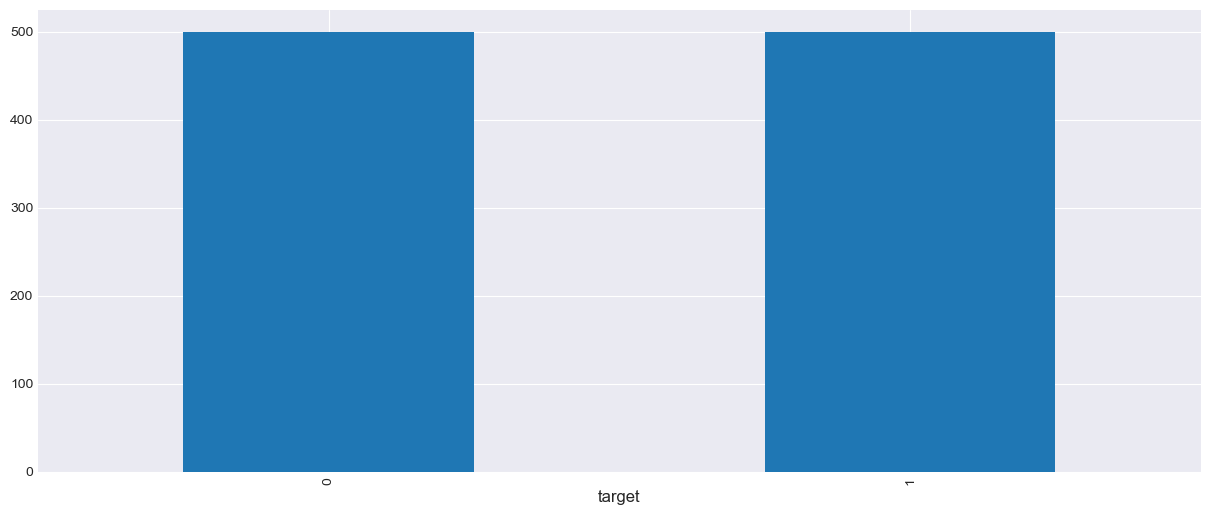

In [14]:
data_df['target'].value_counts().plot(kind = 'bar');

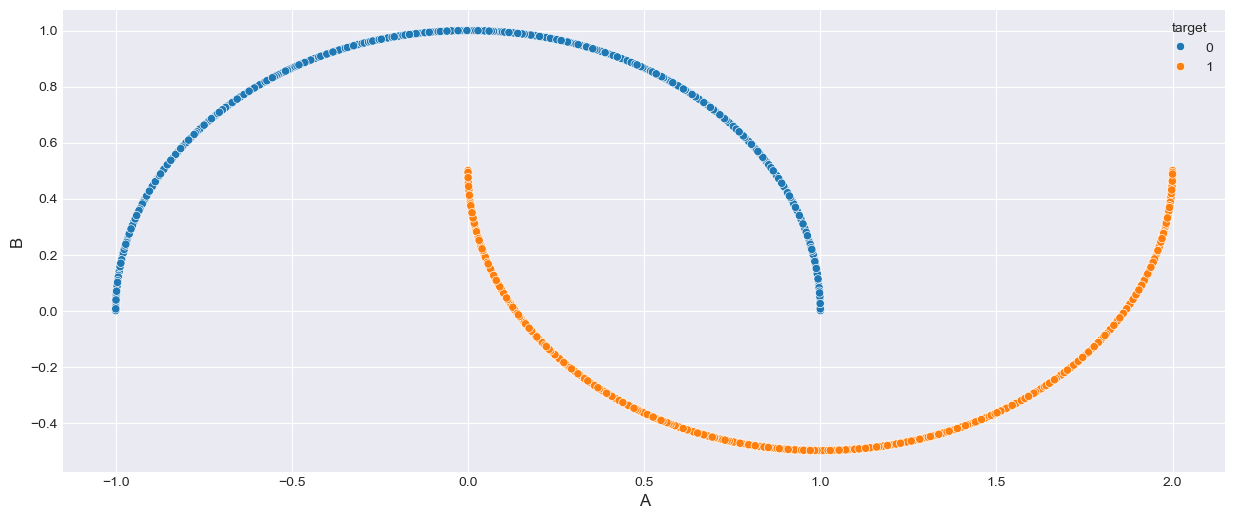

In [15]:
ax = sns.scatterplot(data=data_df, x='A', y='B', hue='target')

In [16]:
TEST_SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=TEST_SIZE,
                                                    stratify=y, 
                                                    random_state=RANDOM_STATE)


### One hidden layer


### Activation Functions
#### Sigmoid

In [19]:
def fn_sigmoid(z):

    return 1 /(1+ np.exp(-z))

In [20]:
fn_sigmoid(np.array([[-1., 0., 1.0], [-np.inf, 0, np.inf]]))

array([[0.26894142, 0.5       , 0.73105858],
       [0.        , 0.5       , 1.        ]])

#### TanH Activation

In [22]:
def fn_actv(z):
    return np.tanh(z)

def fn_actv_prime(a):
    return 1.0 - np.tanh(a)**2

In [23]:
fn_actv(np.array([[-1., 0., 1.0], [-np.inf, 0, np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [24]:
1- np.tanh(-1)**2

0.41997434161402614

In [25]:
def predict(model, X_p):

    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    ### forward propagation
    z1 = X_p.dot(W1) + b1   # layer 1, Aggregation function
    a1 = fn_actv(z1)        # Activations

    z2 = a1.dot(W2) + b2   # layer 1, Aggregation function
    a2 = fn_sigmoid(z2)        # Activations

    return a2 >= 0.5 # will return True/False 

In [26]:
def calculate_loss(model, X_l, y_l):

    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    m = X_l.shape[0]
    
    ### forward propagation
    z1 = X_l.dot(W1) + b1   # layer 1, Aggregation function
    a1 = fn_actv(z1)        # Activations

    z2 = a1.dot(W2) + b2   # layer 1, Aggregation function
    a2 = fn_sigmoid(z2)        # Activations

    data_loss = -(y_l * np.log(a2)).sum()

    return data_loss / m

In [27]:
def build_model(nn_hdim, X_t, y_t, alpha = ALPHA, epochs = EPOCHS):
    '''
    Args:
        nn_hdim: int : number of nodes in hidden layer
        X_t: np.array : train features
        y_t: np.array : train labels
        alpha: float : learning rate
        epochs: int : number of epochs to train
    Return:
        model : dict          
    '''
    m, nn_input_dim = X_t.shape
    nn_output_dim = y_t.shape[1]

    W1 = np.random.rand(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    W2 = np.random.rand(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)

    b1 = np.zeros((1, nn_hdim))
    b2 = np.zeros((1, nn_output_dim))


    
    curr_loss = 0

    loss = []
    epoch = []

    for i in range(epochs):
        
    
        ### forward propagation
        #### Layer 1
        z1 = X_t.dot(W1) + b1   # Aggregation function
        a1 = fn_actv(z1)        # Activations

        #### Layer 2
        z2 = a1.dot(W2) + b2    # Aggregation function
        a2 = fn_sigmoid(z2)     # Activations 

        ### Back Propagation
        ## Layer 2
        dz2 = a2 - y_t
        dW2 = (a1.T).dot(dz2)
        assert (W2.shape == dW2.shape), f'Shape W2: {W2.shape} and dW2 :{dW2.shape}'

        db2 = np.sum(dz2, axis =0, keepdims=True)
        assert (b2.shape == db2.shape), f'Shape b2: {b2.shape} and db2 :{db2.shape}'

        da1 = dz2.dot(W2.T)
        assert (a1.shape == da1.shape), f'Shape a1: {a1.shape} and da1 :{da1.shape}'

        # 1ayer 1
        dz1 = da1 * fn_actv_prime(z1) # this element wise multiplication
        assert (z1.shape == dz1.shape), f'Shape z1: {z1.shape} and dz1 :{dz1.shape}'

        dW1 = (X_t.T).dot(dz1)
        assert (W1.shape == dW1.shape), f'Shape W1: {W1.shape} and dW1 :{dW1.shape}'

        db1 = np.sum(dz1, axis =0, keepdims=True)
        assert (b1.shape == db1.shape), f'Shape b1 : {b1.shape} and db1 :{db1.shape}'

        W1 += -alpha * dW1 /m
        W2 += -alpha * dW2 /m
        b1 += -alpha * db1 /m
        b2 += -alpha * db2 /m

        model = {'W1': W1,
                 'b1': b1,
                 'W2': W2,
                 'b2': b2}
        
        if i%100 == 0:
            curr_loss = calculate_loss(model=model, X_l=X_t, y_l=y_t)
            loss.append(curr_loss)
            epoch.append(i)

        if i%1000 == 0:
            print (f'Loss after {i:5d} epoch : {curr_loss: 9.4f}')
            
    loss_hist['loss'] = loss
    loss_hist['epoch'] = epoch
    return model

In [28]:
# keeping shape of a and y consistent
y_train = y_train.reshape(-1,1)
y_train.shape

(800, 1)

In [29]:
loss_hist = {}

In [30]:
model = build_model(50, X_train, y_train, ALPHA, EPOCHS)

Loss after     0 epoch :    0.3573
Loss after  1000 epoch :    0.0029
Loss after  2000 epoch :    0.0013
Loss after  3000 epoch :    0.0008
Loss after  4000 epoch :    0.0006
Loss after  5000 epoch :    0.0005
Loss after  6000 epoch :    0.0004
Loss after  7000 epoch :    0.0003
Loss after  8000 epoch :    0.0003
Loss after  9000 epoch :    0.0002
Loss after 10000 epoch :    0.0002
Loss after 11000 epoch :    0.0002
Loss after 12000 epoch :    0.0002
Loss after 13000 epoch :    0.0002
Loss after 14000 epoch :    0.0001
Loss after 15000 epoch :    0.0001
Loss after 16000 epoch :    0.0001
Loss after 17000 epoch :    0.0001
Loss after 18000 epoch :    0.0001
Loss after 19000 epoch :    0.0001


In [31]:
# model['W1'].shape, model['W2'].shape, model['b1'].shape, model['b2'].shape

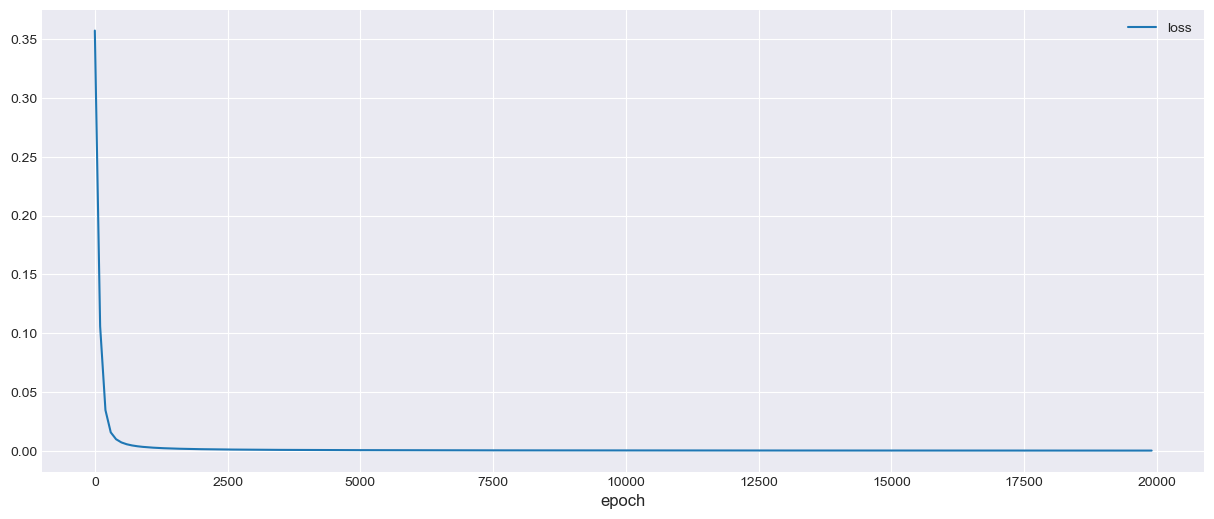

In [32]:
pd.DataFrame(loss_hist).plot(x='epoch', y='loss');

### Training Data

In [34]:
y_pred = predict(model, X_train)

accuracy_score(y_pred=y_pred, y_true=y_train)

1.0

In [35]:
cm = confusion_matrix(y_pred=y_pred, y_true=y_train)
cm

array([[400,   0],
       [  0, 400]], dtype=int64)

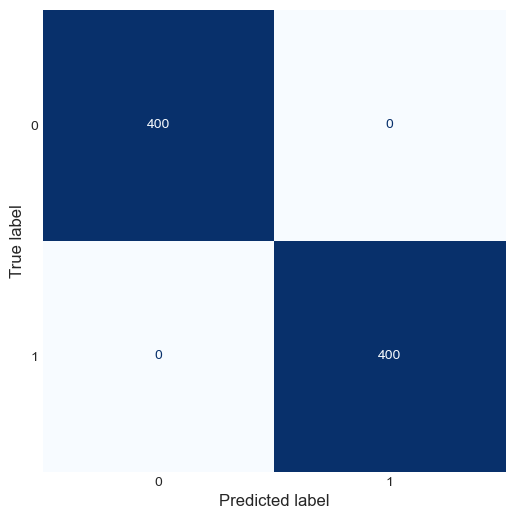

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot(cmap='Blues', colorbar=False)
plt.grid()
plt.show()

### Testing Data

Test Accuracy: 1.0


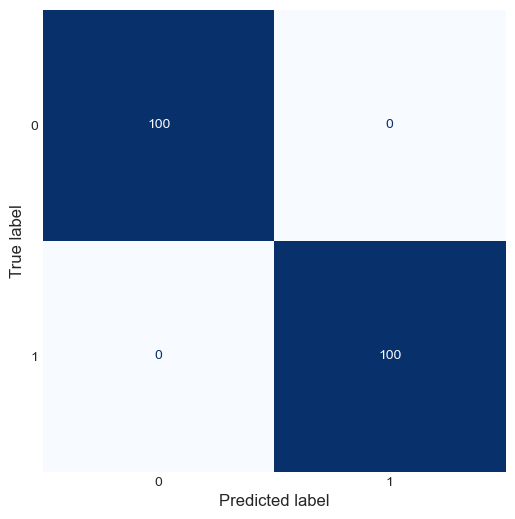

In [38]:
y_pred = predict(model, X_test)


# calculate accuracy
print (f'Test Accuracy: {accuracy_score(y_pred=y_pred, y_true=y_test)}')

# calculate confusion matrix
cm = confusion_matrix(y_pred=y_pred, y_true=y_test)

# plots always look good
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

disp.plot(cmap='Blues', colorbar=False)
plt.grid()
plt.show()

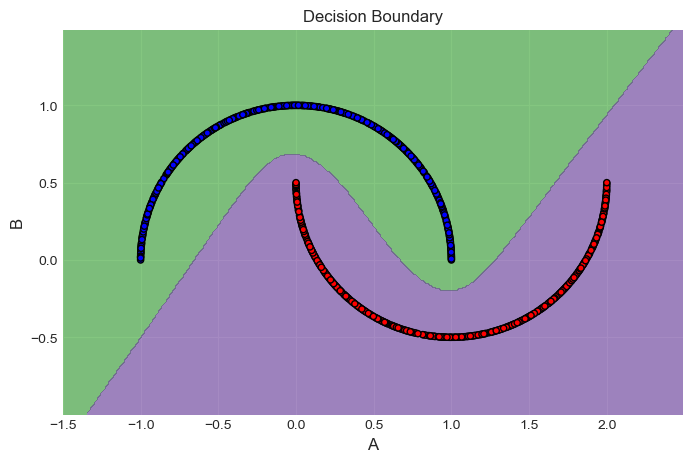

In [39]:
fn_plot_decision_boundary(lambda x: predict(model, x), X_train, y_train)